# Partial Solution: Testing the Stationary using ADF

In [1]:
# This code imports the data you generated before for replicating.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

stock_prices = pd.read_csv('stock_prices.csv')
stock_prices = stock_prices.set_index('timestamp')

The statistical way of detecting non-stationarity is more reliable and ADF test is widely appreciated test.

Let us check if the data is stationary using statistical tool known as `Augmented Dickey Fuller (ADF)`. The hypothesis of this test is:

$$H_0 = \text{There is a unit root}$$
$$H_A = \text{There is no unit root}$$

Please see [this explanation](https://en.wikipedia.org/wiki/Unit_root) for the relationship between unit root and stationarity.

According to this test result, the p-value of 0.67 suggests that there is non-stationarity in the data as it is higher than 0.05 in the case you have a confidence interval of 95% (corresponding 5% significance level). Now, you need to deal with this non-stationarity before moving forward.

In [2]:
stat_test = adfuller(stock_prices['T'])[0:2]
print(f'The test statistic and p-value for AT&T are {stat_test}')

The test statistic and p-value for AT&T are (-1.1856243786134169, 0.6797489695872558)


It turns out it is not stationary, so let us calculate the first difference while doing that first observation becomes missing value. So, we drop it.

In [3]:
diff_T = stock_prices['T'].diff().dropna()

In [4]:
stat_test = adfuller(diff_T)[0:2]
print(f'The test statistic and p-value for AT&T are {stat_test}')

The test statistic and p-value for AT&T are (-6.629083586827914, 5.775849021851074e-09)


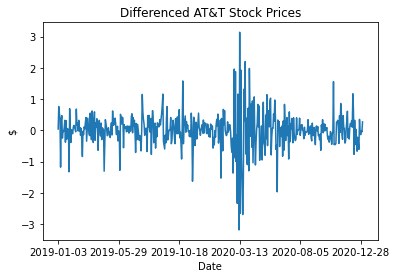

In [5]:
diff_T.plot()
plt.title('Differenced AT&T Stock Prices')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

ACF confirms that the data is stationary as the correlation structure decays too fast despite some spikes.

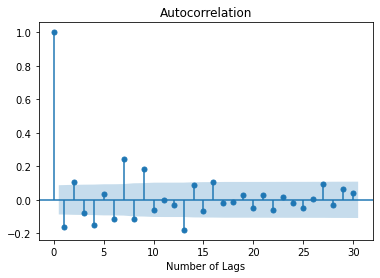

In [6]:
sm.graphics.tsa.plot_acf(diff_T,lags=30)
plt.xlabel('Number of Lags')
plt.show()